In [1]:
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow.compat.v1 as tf
import numpy as np

In [2]:
bulucu= dlib.get_frontal_face_detector()
bicim= dlib.shape_predictor('modeller/shape_predictor_5_face_landmarks.dat') 

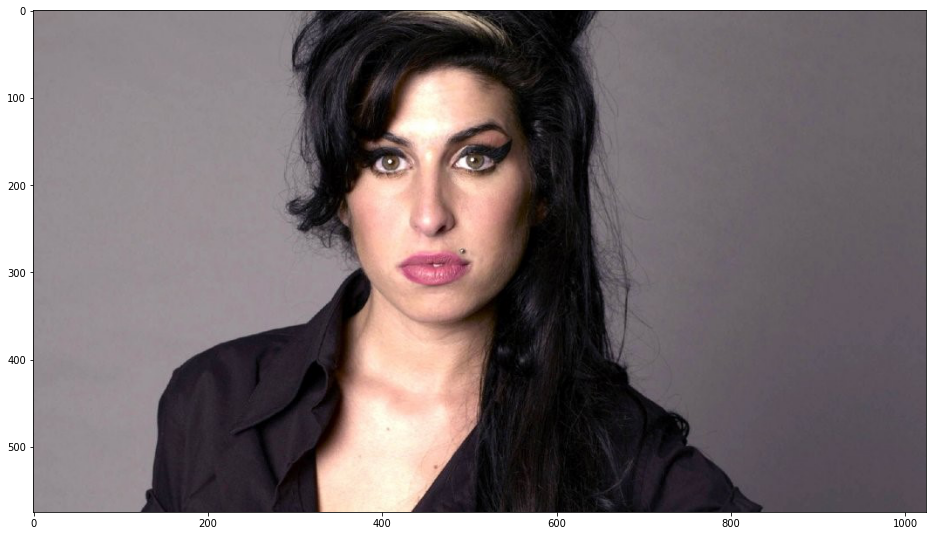

In [3]:
foto = dlib.load_rgb_image('fotolar/06.jpg')

plt.figure(figsize=(16, 10))
plt.imshow(foto)

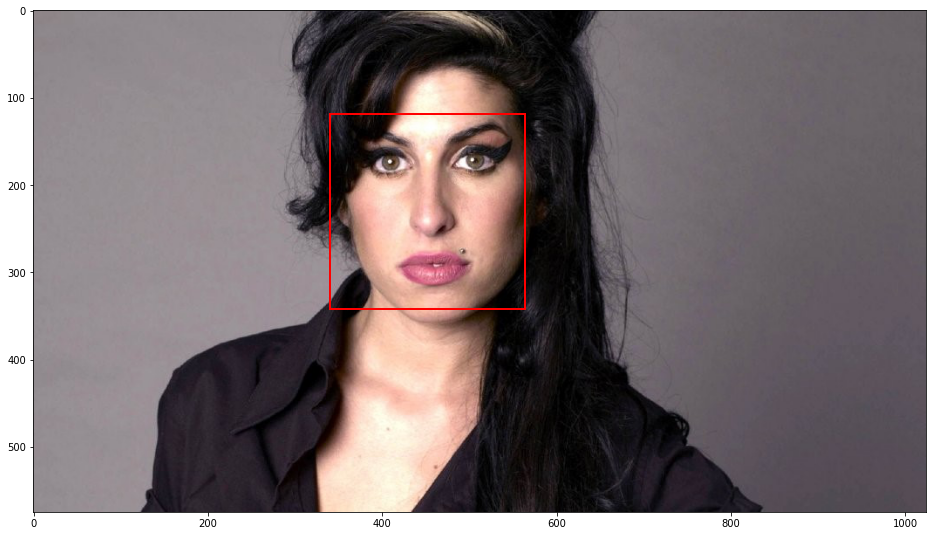

In [4]:
fotosonuc = foto.copy()

blc= bulucu(foto, 1)

if len(blc) == 0:
    print('Yüz Bulunamadı!')

fig, ax = plt.subplots(1, figsize=(16, 10))

for det in blc:
    k, l, m, n = det.left(), det.top(), det.width(), det.height()

    rect = patches.Rectangle((k, l), m, n, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.imshow(fotosonuc)

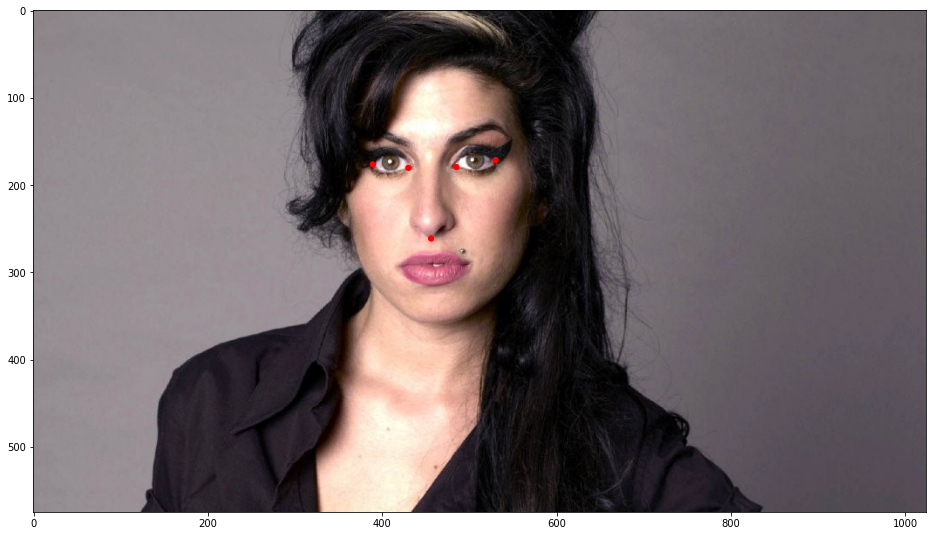

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 10))
nesne = dlib.full_object_detections()
for detection in blc:
    s = bicim(foto, detection)
    nesne.append(s)
    for point in s.parts():
        circle = patches.Circle((point.x, point.y), radius=3, edgecolor='r', facecolor='r')
        ax.add_patch(circle)
ax.imshow(fotosonuc)

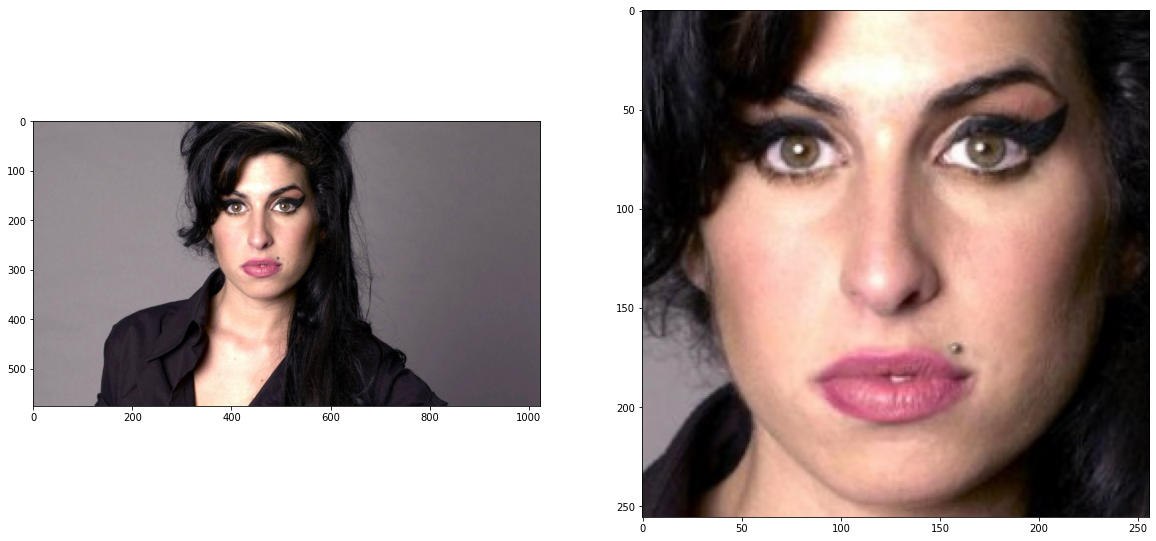

In [6]:
yuzler = dlib.get_face_chips(foto, nesne, size=256, padding=0.18)

fig, axes = plt.subplots(1, len(yuzler)+1, figsize=(20, 16))

axes[0].imshow(foto)

for p, yuz in enumerate(yuzler):
    axes[p+1].imshow(yuz)

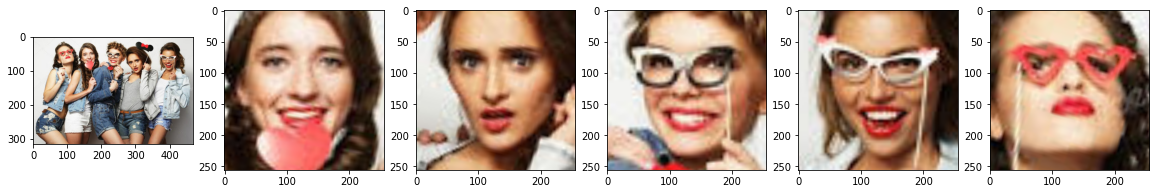

In [7]:

def hizali_yuzler(foto):
    blc = bulucu(foto, 1)
    
    nesne = dlib.full_object_detections()

    for detection in blc:
        s = bicim(foto, detection)
        nesne.append(s)
    yuzler = dlib.get_face_chips(foto, nesne, size=256, padding=0.35)
    return yuzler

# çoklu yüzde hizalama işlemi kontrolü
kontrol_foto = dlib.load_rgb_image('fotolar/07.jpg')
kontrol_yuzler = hizali_yuzler(kontrol_foto)
fig, axes = plt.subplots(1, len(kontrol_yuzler)+1, figsize=(20, 16))
axes[0].imshow(kontrol_foto)
for i, yuz in enumerate(kontrol_yuzler):
    axes[i+1].imshow(yuz)

In [8]:
tf.disable_v2_behavior()
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

saver = tf.train.import_meta_graph('modeller/model.meta')
saver.restore(sess, tf.train.latest_checkpoint('modeller'))
graph = tf.get_default_graph()

X = graph.get_tensor_by_name('X:0') #KAYNAK FOTOĞRAF
Y = graph.get_tensor_by_name('Y:0') #AKTARILAN FOTOĞRAF 
Xs = graph.get_tensor_by_name('generator/xs:0') #SONUC

Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Restoring parameters from modeller\model


In [9]:
def islemoncesi(foto):
    return foto.astype(np.float32) / 127.5 - 1.

def islemsonrasi(foto):
    return ((foto + 1.) * 127.5).astype(np.uint8)

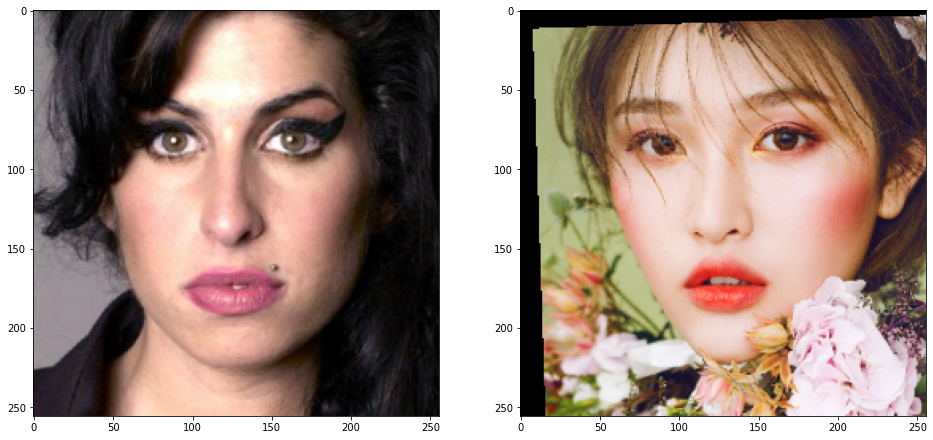

In [10]:
foto1 = dlib.load_rgb_image('fotolar/06.jpg')
foto1_yuzler = hizali_yuzler(foto1)

foto2 = dlib.load_rgb_image('fotolar/makyaj/06.png')
foto2_yuzler = hizali_yuzler(foto2)

fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes[0].imshow(foto1_yuzler[0])
axes[1].imshow(foto2_yuzler[0])

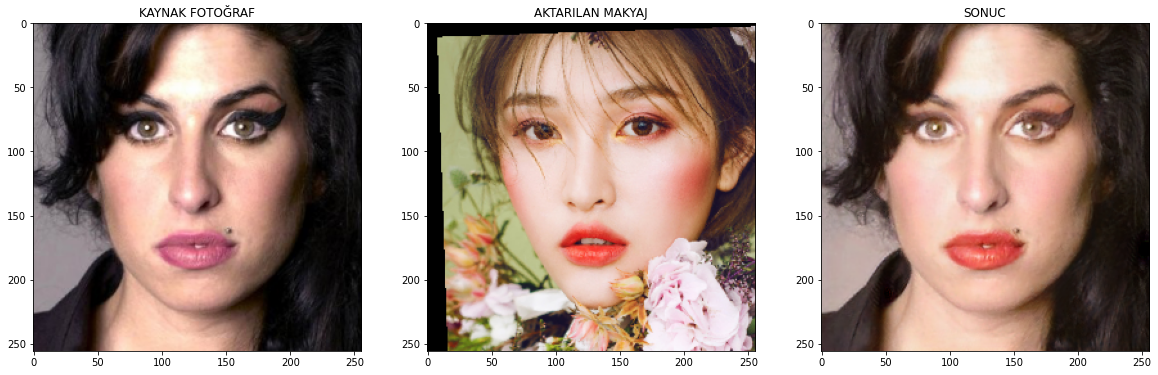

In [11]:
src_foto = foto1_yuzler[0]
ref_foto = foto2_yuzler[0]

X_foto = islemoncesi(src_foto)
X_foto = np.expand_dims(X_foto, axis=0)

Y_foto = islemoncesi(ref_foto)
Y_foto = np.expand_dims(Y_foto, axis=0)

cıkıs= sess.run(Xs, feed_dict={
    X: X_foto,
    Y: Y_foto
})

cıkıs_foto = islemsonrasi(cıkıs[0])

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].set_title('KAYNAK FOTOĞRAF')
axes[0].imshow(src_foto)
axes[1].set_title('AKTARILAN MAKYAJ')
axes[1].imshow(ref_foto)
axes[2].set_title('SONUC')
axes[2].imshow(cıkıs_foto)